# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('stud_math.csv')

## Data Preprocessing

### Unifying column names / renaming

In [3]:
display(df.head(0))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [4]:
df.columns = ['school', 'sex', 'age', 'address_type', 'family_size', 'parent_status', 'mother_education', 'father_education', 'mother_job', 'father_job', 'school_selection_reason', 'guardian', 'travel_time', 'study_time', 'failures', 'school_edu_support', 'family_edu_support', 'paid_tuitor', 'activities', 'nursery', 'study_time_granular', 'higher_intention', 'home_internet', 'has_romantic', 'family_relations', 'free_time', 'go_out_time', 'health_state', 'absences_count', 'score']

### Helper Functions

In [5]:
def replace_empty_with_none(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: None if str(x).strip() == '' else x)
    df[column_name] = df[column_name].apply(lambda x: None if type(x) == float and math.isnan(x) else x)

In [6]:
def check_types(series):
    return pd.Series([type(x).__name__ for x in series.unique()]).unique()

In [7]:
def none_values(series):
    return len(series[series.isnull()])

In [8]:
def nunique(series):
    return series.nunique(dropna=False)

In [9]:
def value_counts(series):
    return pd.Series(['None' if x is None else x for x in series]).value_counts()

In [10]:
def hist(series):
    return series.hist(bins=series.nunique())

In [61]:
def hist_with_none(series):
    return hist(pd.Series(['None' if x is None else x for x in series]))

In [60]:
def info(df, column_name):
    replace_empty_with_none(df, column_name)

    series = df[column_name]
    unique_values = series.unique()
    if str(series.dtype) in ['int64', 'float64']:
        unique_values.sort()
    print('None values count:   {} out of {}'.format(
        none_values(series), len(df)))
    print('Count of unique values occuring more then 10 times: {} out of {}'.format(
        (series.value_counts(dropna=False) > 10).sum(), nunique(series)))
    print('Unique values count: {}  {} of types {}'.format(
        nunique(series),
        unique_values,
        check_types(series)))
    print(value_counts(series))

    display(hist_with_none(series))

In [59]:
def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [58]:
def get_stat_dif(df, column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Statistically significant differences found for column:', column)
            break

### Primary data review

In [15]:
display(df.head(10))
df.info()

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_edu_support,family_edu_support,paid_tuitor,activities,nursery,study_time_granular,higher_intention,home_internet,has_romantic,family_relations,free_time,go_out_time,health_state,absences_count,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   395 non-null    object 
 1   sex                      395 non-null    object 
 2   age                      395 non-null    int64  
 3   address_type             378 non-null    object 
 4   family_size              368 non-null    object 
 5   parent_status            350 non-null    object 
 6   mother_education         392 non-null    float64
 7   father_education         371 non-null    float64
 8   mother_job               376 non-null    object 
 9   father_job               359 non-null    object 
 10  school_selection_reason  378 non-null    object 
 11  guardian                 364 non-null    object 
 12  travel_time              367 non-null    float64
 13  study_time               388 non-null    float64
 14  failures                 3

## Primary column data analysis

### School (abbreviation / name) (categorical)

None values count:   0 out of 395
Count of unique values occuring more then 10 times: 2 out of 2
Unique values count: 2  ['GP' 'MS'] of types ['str']
GP    349
MS     46
dtype: int64


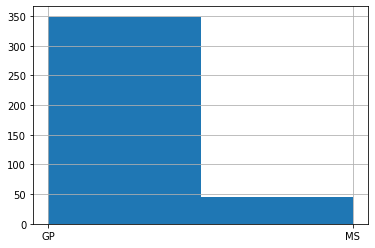

In [16]:
info(df, 'school')

Too little schools represented. Too disproportional values distribution.

### Sex (categorical)

None values count:   0 out of 395
Count of unique values occuring more then 10 times: 2 out of 2
Unique values count: 2  ['F' 'M'] of types ['str']
F    208
M    187
dtype: int64


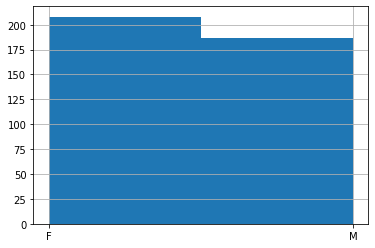

In [17]:
info(df, 'sex')

Regular genders proportion.

### Age (categorical ordered)

None values count:   0 out of 395
Count of unique values occuring more then 10 times: 5 out of 8
Unique values count: 8  [15 16 17 18 19 20 21 22] of types ['int64']
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
dtype: int64


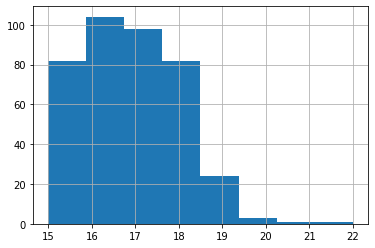

In [18]:
info(df, 'age')

It is suspicious why 15 years old students count in the data set is less than 16 years old ones. Might be specific years features of baby boom or demographic baby drop. Might be wrong sample selection.

### Address type {Urban, Rural} (categorical)

None values count:   17 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['U' None 'R'] of types ['str' 'NoneType']
U       295
R        83
None     17
dtype: int64


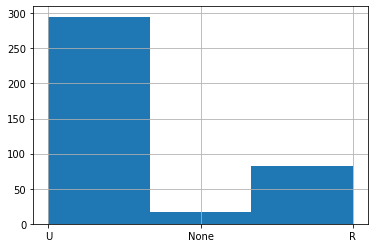

In [19]:
info(df, 'address_type')

17 samples with undefined value

### Family size (categorical ordered)

None values count:   27 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  [None 'GT3' 'LE3'] of types ['NoneType' 'str']
GT3     261
LE3     107
None     27
dtype: int64


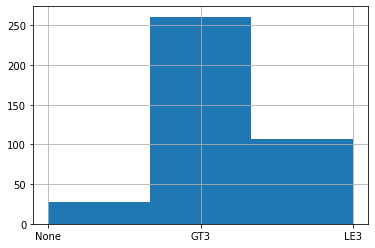

In [20]:
info(df, 'family_size')

27 records with undefined value

### Parent status (categorical)

None values count:   45 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['A' None 'T'] of types ['str' 'NoneType']
T       314
None     45
A        36
dtype: int64


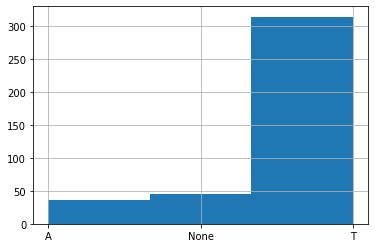

In [21]:
info(df, 'parent_status')

45 records with undefined value

### Mother education (categorical ordered)

None values count:   3 out of 395
Count of unique values occuring more then 10 times: 4 out of 6
Unique values count: 6  [ 0.  1.  2.  3.  4. nan] of types ['float64']
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
dtype: int64


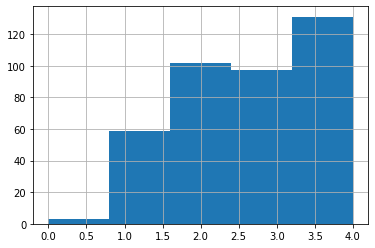

In [22]:
info(df, 'mother_education')

### Father education (categorical ordered)

Records with type in column 1
None values count:   24 out of 395
Count of unique values occuring more then 10 times: 5 out of 6
Unique values count: 6  [ 0.  1.  2.  3.  4. nan] of types ['float64']
2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
dtype: int64


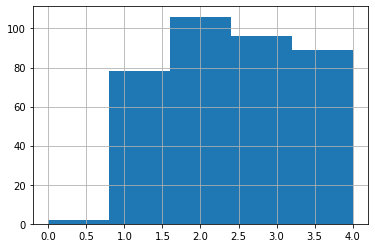

In [23]:
print('Records with type in column', len(df[df.father_education == 40]))
df.father_education = df.father_education.apply(lambda x: 4 if x == 40 else x)

info(df, 'father_education')


### Mother job (categorical)

None values count:   19 out of 395
Count of unique values occuring more then 10 times: 6 out of 6
Unique values count: 6  ['at_home' 'health' 'other' 'services' 'teacher' None] of types ['str' 'NoneType']
other       133
services     98
at_home      58
teacher      55
health       32
None         19
dtype: int64


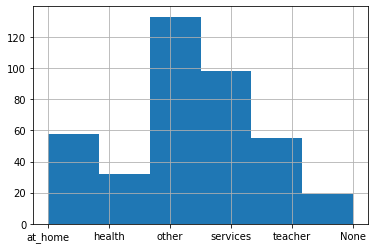

In [24]:
info(df, 'mother_job')

### Father job (categorical)

None values count:   36 out of 395
Count of unique values occuring more then 10 times: 6 out of 6
Unique values count: 6  ['teacher' 'other' None 'health' 'services' 'at_home'] of types ['str' 'NoneType']
other       197
services    102
None         36
teacher      29
at_home      16
health       15
dtype: int64


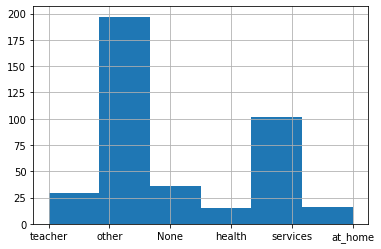

In [25]:
info(df, 'father_job')

### School selection reason (categorical)

None values count:   17 out of 395
Count of unique values occuring more then 10 times: 5 out of 5
Unique values count: 5  ['course' 'other' 'home' 'reputation' None] of types ['str' 'NoneType']
course        137
home          104
reputation    103
other          34
None           17
dtype: int64


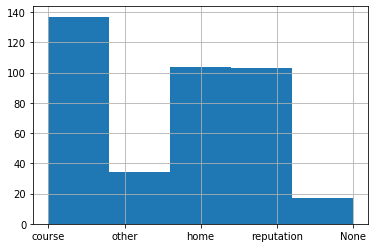

In [26]:
info(df, 'school_selection_reason')

### Guardian (categorical)

None values count:   31 out of 395
Count of unique values occuring more then 10 times: 4 out of 4
Unique values count: 4  ['mother' 'father' 'other' None] of types ['str' 'NoneType']
mother    250
father     86
None       31
other      28
dtype: int64


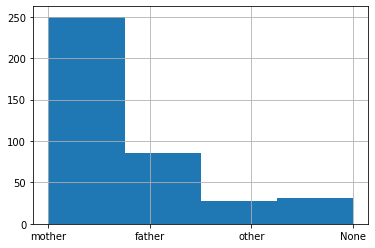

In [27]:
info(df, 'guardian')

### Failures (categorical)

None values count:   22 out of 395
Count of unique values occuring more then 10 times: 5 out of 5
Unique values count: 5  [ 0.  1.  2.  3. nan] of types ['float64']
0.0    293
1.0     49
2.0     16
3.0     15
dtype: int64


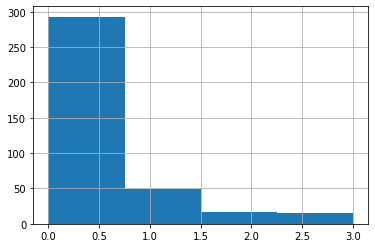

In [28]:
info(df, 'failures')

### School education support (categorical)

None values count:   9 out of 395
Count of unique values occuring more then 10 times: 2 out of 3
Unique values count: 3  ['yes' 'no' None] of types ['str' 'NoneType']
no      335
yes      51
None      9
dtype: int64


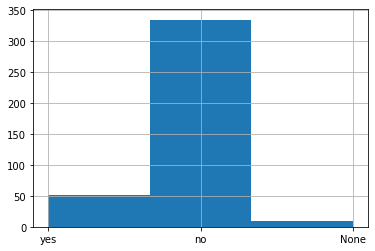

In [29]:
info(df, 'school_edu_support')

### Family education support (categorical)

None values count:   39 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['no' 'yes' None] of types ['str' 'NoneType']
yes     219
no      137
None     39
dtype: int64


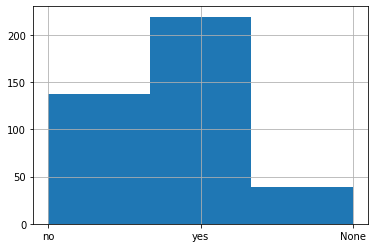

In [30]:
info(df, 'family_edu_support')

### Paid tuitor (categorical)

None values count:   40 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['no' None 'yes'] of types ['str' 'NoneType']
no      200
yes     155
None     40
dtype: int64


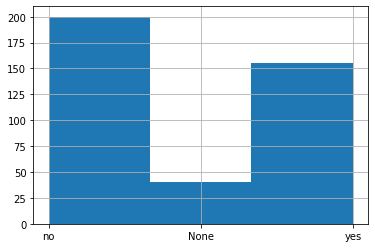

In [31]:
info(df, 'paid_tuitor')

### Activities (categorical)

None values count:   14 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['no' 'yes' None] of types ['str' 'NoneType']
yes     195
no      186
None     14
dtype: int64


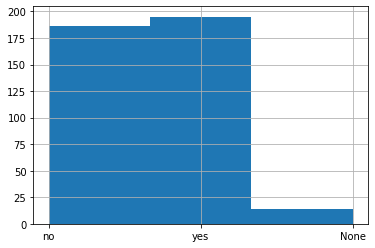

In [32]:
info(df, 'activities')

### Nursery (categorical)

None values count:   16 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['yes' 'no' None] of types ['str' 'NoneType']
yes     300
no       79
None     16
dtype: int64


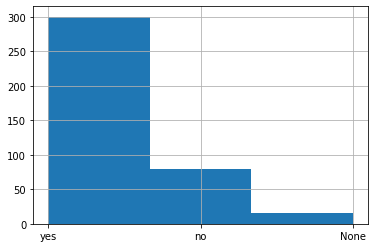

In [33]:
info(df, 'nursery')

### Study time (categorical ordered)

None values count:   7 out of 395
Count of unique values occuring more then 10 times: 4 out of 5
Unique values count: 5  [ 1.  2.  3.  4. nan] of types ['float64']
2.0    194
1.0    103
3.0     64
4.0     27
dtype: int64


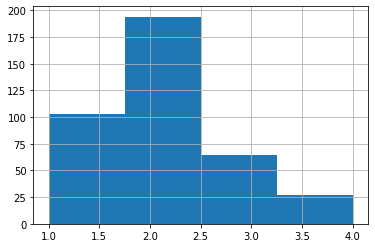

In [34]:
info(df, 'study_time')

### Intention to get higher education (categorical)

None values count:   20 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['yes' None 'no'] of types ['str' 'NoneType']
yes     356
None     20
no       19
dtype: int64


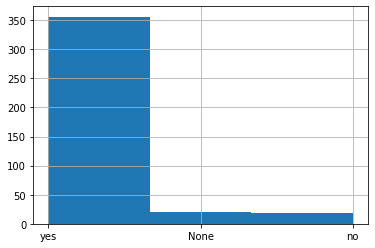

In [35]:
info(df, 'higher_intention')

### Internet at home (categorical)

None values count:   34 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  [None 'yes' 'no'] of types ['NoneType' 'str']
yes     305
no       56
None     34
dtype: int64


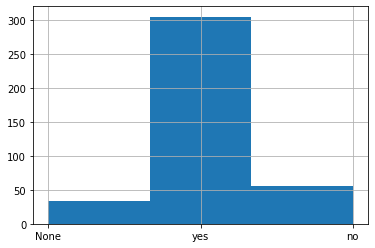

In [36]:
info(df, 'home_internet')

### Has romantic relationship (categorical)

None values count:   31 out of 395
Count of unique values occuring more then 10 times: 3 out of 3
Unique values count: 3  ['no' None 'yes'] of types ['str' 'NoneType']
no      240
yes     124
None     31
dtype: int64


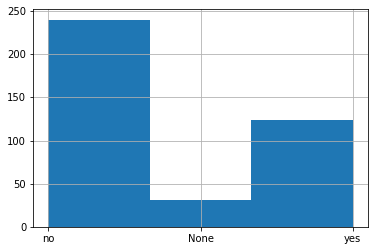

In [37]:
info(df, 'has_romantic')

### Family relations (categorical ordered)

None values count:   28 out of 395
Count of unique values occuring more then 10 times: 5 out of 6
Unique values count: 6  [ 1.  2.  3.  4.  5. nan] of types ['float64']
4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
dtype: int64


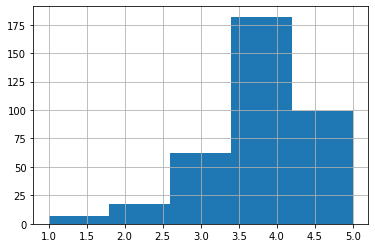

In [38]:
df.family_relations = df.family_relations.apply(lambda x: numpy.nan if x < 1 else x)
info(df, 'family_relations')

### Travel time (categorical ordered)

None values count:   28 out of 395
Count of unique values occuring more then 10 times: 4 out of 5
Unique values count: 5  [ 1.  2.  3.  4. nan] of types ['float64']
1.0    242
2.0     96
3.0     22
4.0      7
dtype: int64


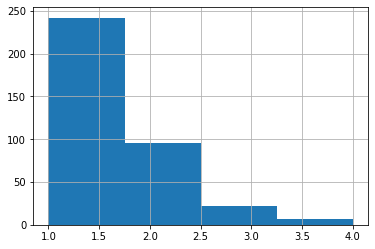

In [39]:
info(df, 'travel_time')

### Free time (categorical ordered)

None values count:   11 out of 395
Count of unique values occuring more then 10 times: 6 out of 6
Unique values count: 6  [ 1.  2.  3.  4.  5. nan] of types ['float64']
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
dtype: int64


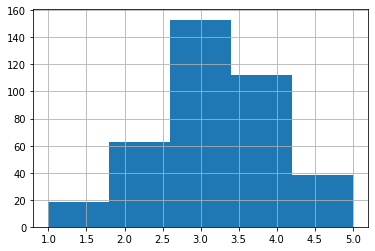

In [40]:
info(df, 'free_time')

### Going out time (categorical ordered)

None values count:   8 out of 395
Count of unique values occuring more then 10 times: 5 out of 6
Unique values count: 6  [ 1.  2.  3.  4.  5. nan] of types ['float64']
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
dtype: int64


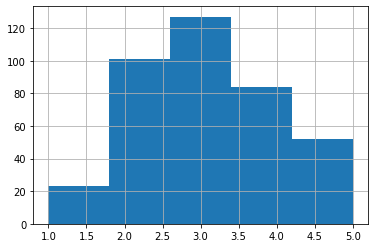

In [41]:
info(df, 'go_out_time')

### Health state (categorical ordered)

None values count:   15 out of 395
Count of unique values occuring more then 10 times: 6 out of 6
Unique values count: 6  [ 1.  2.  3.  4.  5. nan] of types ['float64']
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
dtype: int64


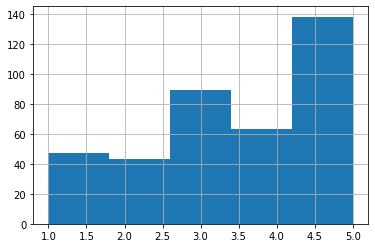

In [42]:
info(df, 'health_state')

### Absences count (continuous)

None values count:   12 out of 395
Count of unique values occuring more then 10 times: 9 out of 37
Unique values count: 37  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  28.
  30.  38.  40.  54.  56.  75. 212. 385.  nan] of types ['float64']
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
dtype: int64


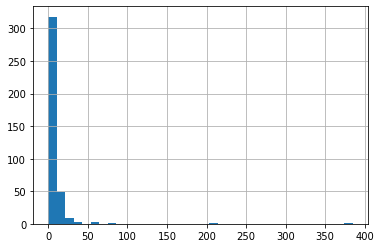

In [43]:
info(df, 'absences_count')

### Score (metrics to optimize) (continuous)

None values count:   6 out of 395
Count of unique values occuring more then 10 times: 12 out of 19
Unique values count: 19  [  0.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.
  85.  90.  95. 100.  nan] of types ['float64']
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
dtype: int64


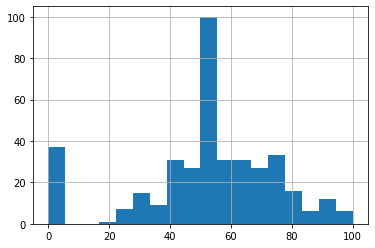

In [44]:
info(df, 'score')

## Score distribution and outliers

25-th percentile: 40.0, 75-th percentile: 70.0, IQR: 30.0,  Outliers range: [-5.0, 115.0].


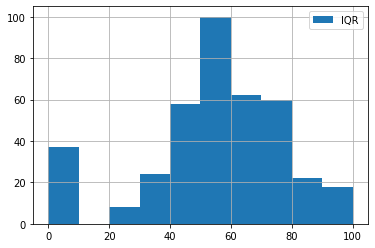

In [45]:
median = df.score.median()
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
IQR = perc75 - perc25
out1 = perc25 - 1.5*IQR
out2 = perc75 + 1.5*IQR
print('25-th percentile: {},'.format(perc25), '75-th percentile: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Outliers range: [{f}, {l}].".format(f=out1, l=out2))
df.score.loc[df.score.between(out1, out2)].hist(bins = 10, range = (0, 100), label = 'IQR')
plt.legend();

Score has unexpectedly high count of 0 values. Considering such records outliers and filtering them out.

In [46]:
df = df[df.score > 0]

In [47]:
len(df)

352

## Pair dependencies with regression

In [48]:
df.drop(['study_time_granular'], inplace = True, axis = 1)

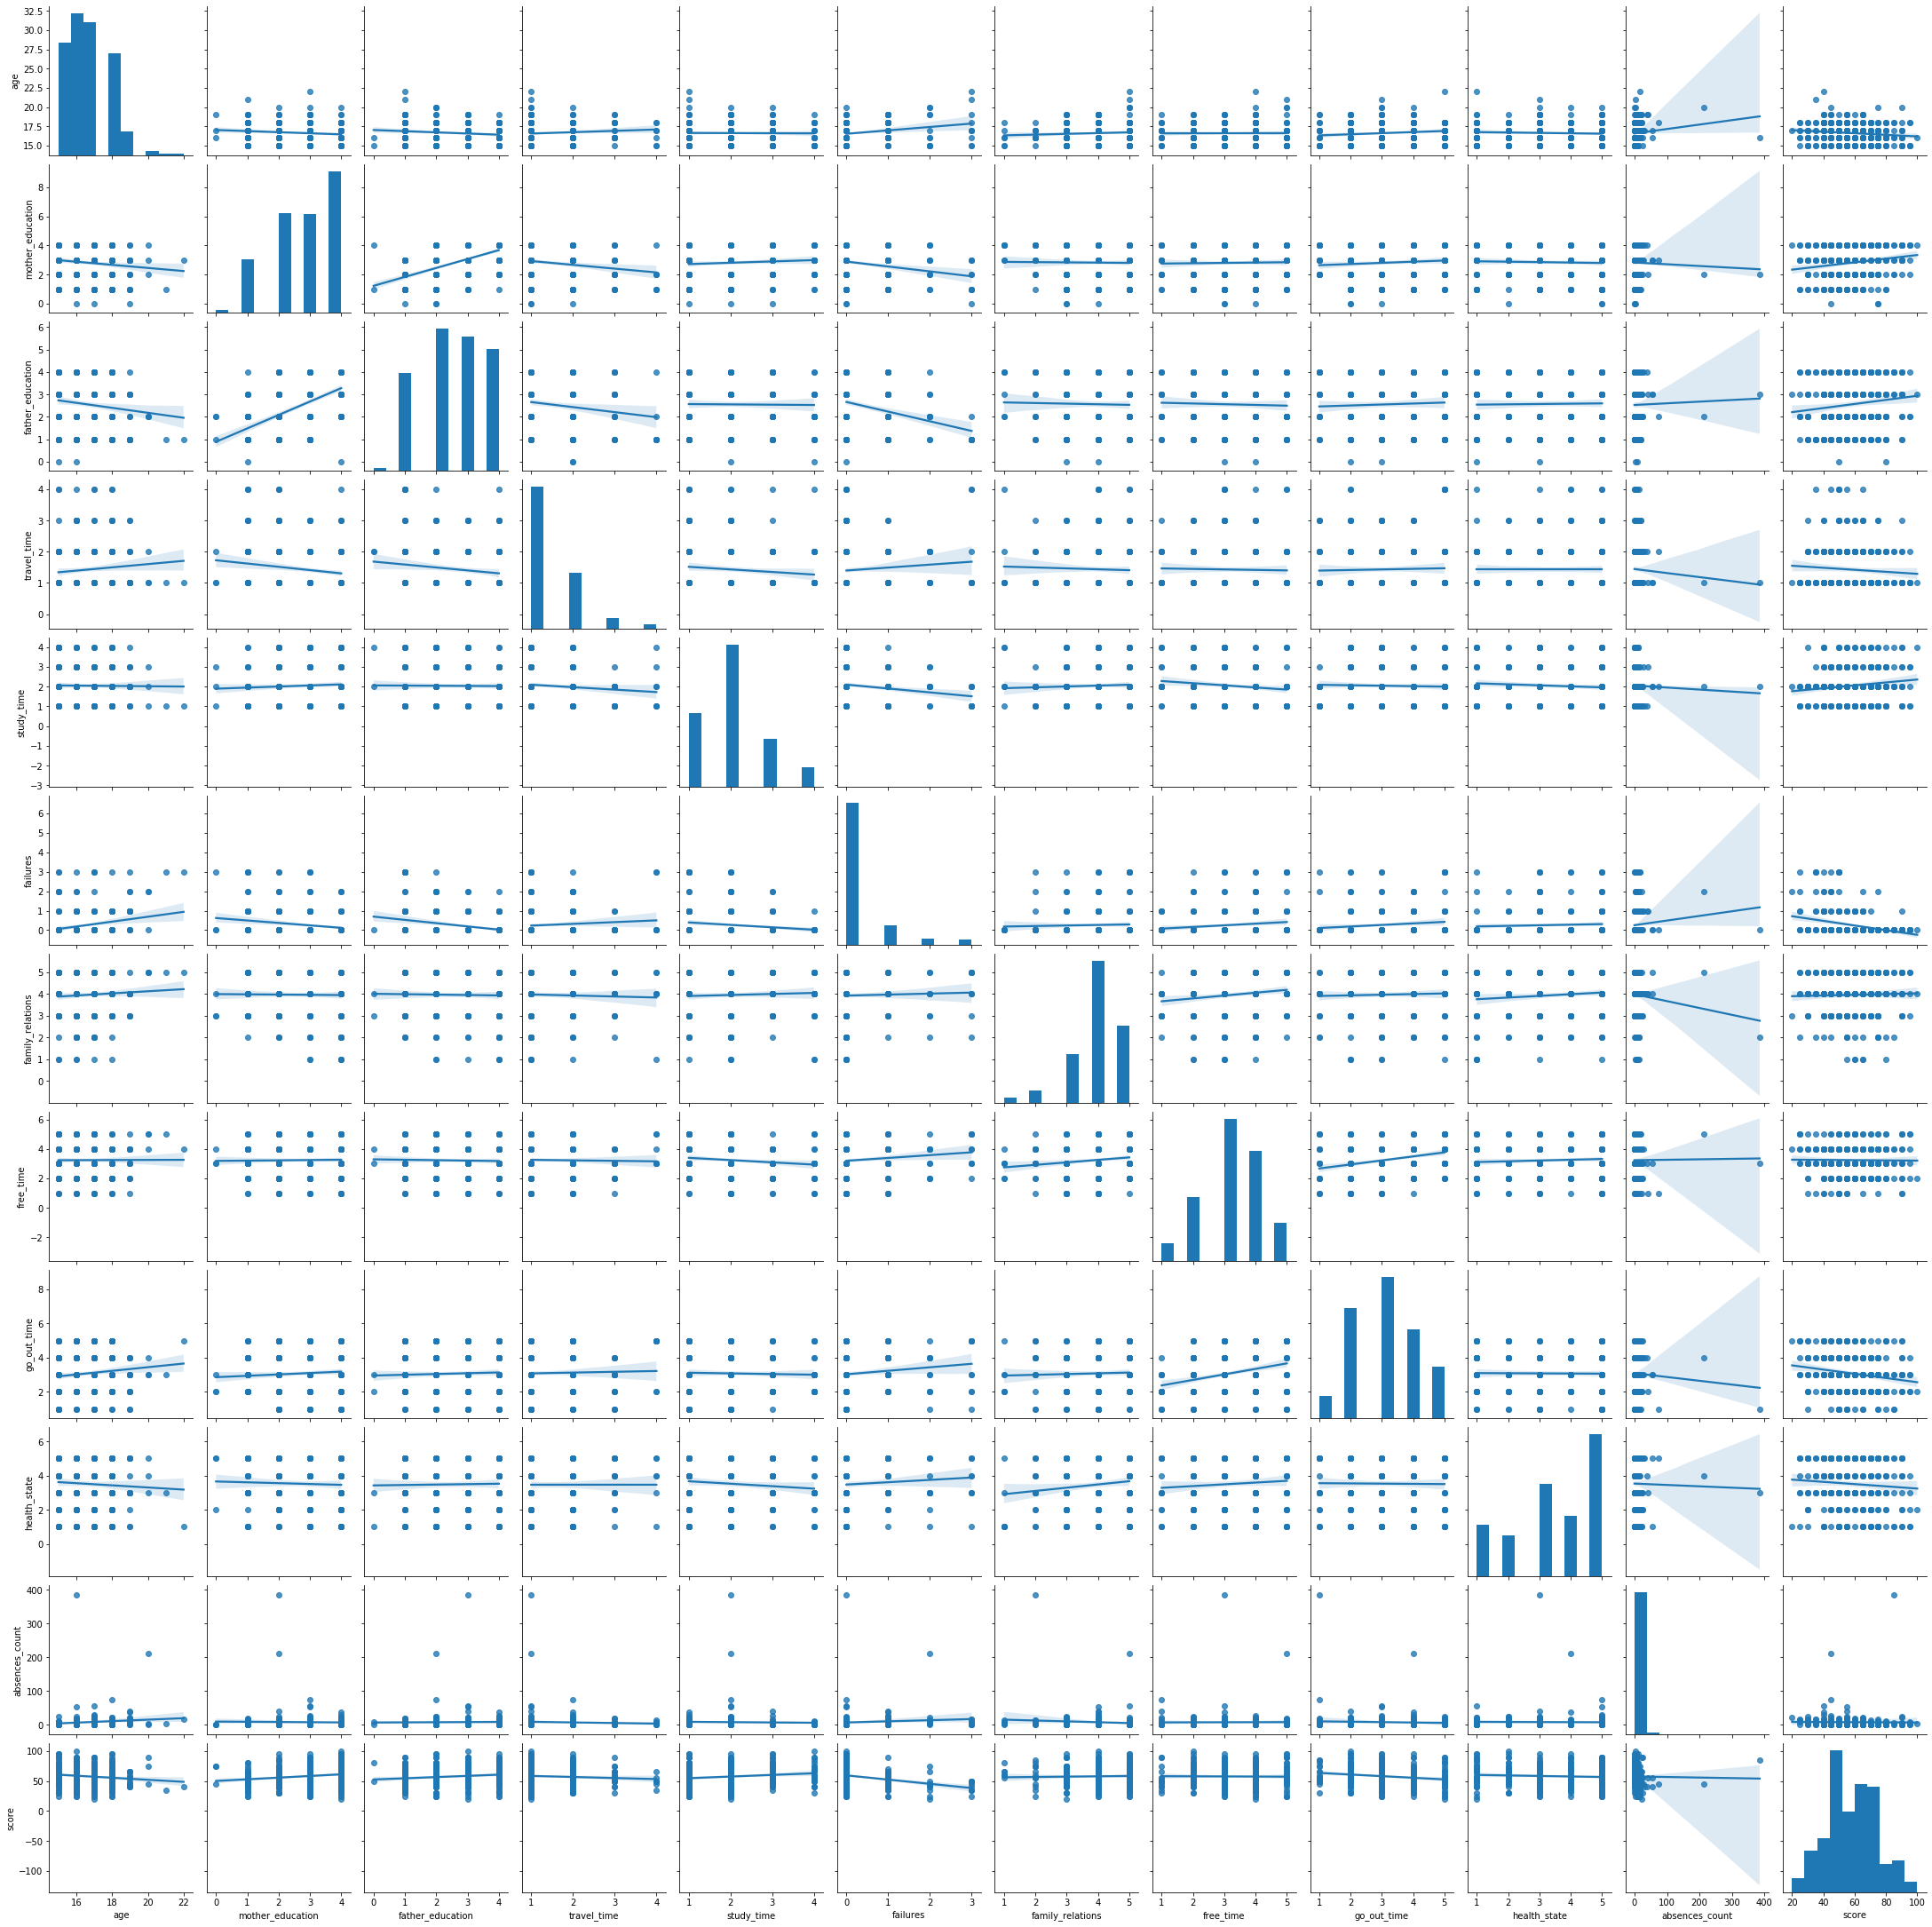

In [49]:
sns.pairplot(df, kind = 'reg')

## Correlation

In [50]:
non_categorical_variables = df[['absences_count', 'score']]

In [51]:
non_categorical_variables.corr()

,absences_count,score
absences_count,1.000000,-0.014039
score,-0.014039,1.000000


Absences count and score variables correlation coeffecient < 0.05 - absences count won't be taken into account in future.

In [52]:
ordered_variables = df[['age', 'family_size', 'mother_education', 'father_education', 'study_time', 'travel_time', 'free_time', 'go_out_time', 'failures', 'family_relations', 'health_state', 'absences_count', 'score']]


In [53]:
ordered_variables.corr()

,age,mother_education,father_education,study_time,travel_time,free_time,go_out_time,failures,family_relations,health_state,absences_count,score
age,1.000000,-0.122979,-0.130010,-0.011426,0.095370,0.004837,0.123638,0.235875,0.069025,-0.056173,0.112599,-0.131542
mother_education,-0.122979,1.000000,0.606270,0.070533,-0.165394,0.021002,0.080556,-0.205944,-0.013997,-0.038050,-0.027377,0.186477
father_education,-0.130010,0.606270,1.000000,-0.010779,-0.145471,-0.030449,0.044127,-0.268901,-0.022529,0.018671,0.017545,0.135268
study_time,-0.011426,0.070533,-0.010779,1.000000,-0.101490,-0.128661,-0.029686,-0.156406,0.045260,-0.085469,-0.030187,0.142055
travel_time,0.095370,-0.165394,-0.145471,-0.101490,1.000000,-0.023067,0.029374,0.091757,-0.036807,-0.000092,-0.047560,-0.075516
free_time,0.004837,0.021002,-0.030449,-0.128661,-0.023067,1.000000,0.296392,0.127391,0.148843,0.072729,0.007748,-0.012457
go_out_time,0.123638,0.080556,0.044127,-0.029686,0.029374,0.296392,1.000000,0.126770,0.035723,-0.010343,-0.050616,-0.182286
failures,0.235875,-0.205944,-0.268901,-0.156406,0.091757,0.127391,0.126770,1.000000,0.035227,0.064083,0.089541,-0.289377
family_relations,0.069025,-0.013997,-0.022529,0.045260,-0.036807,0.148843,0.035723,0.035227,1.000000,0.120631,-0.089767,0.030041
health_state,-0.056173,-0.038050,0.018671,-0.085469,-0.000092,0.072729,-0.010343,0.064083,0.120631,1.000000,-0.014308,-0.075340


In [54]:
categorical_variables = df.drop(['absences_count', 'score'], axis=1)

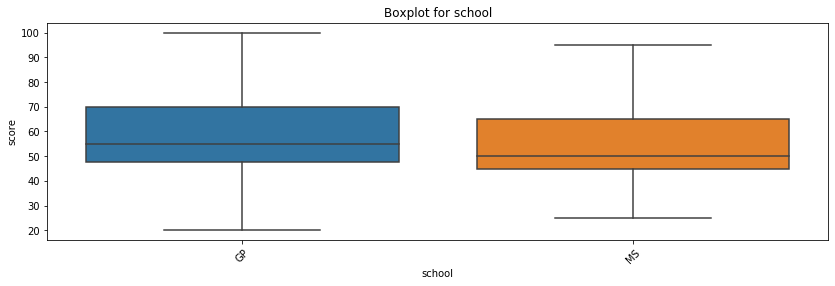

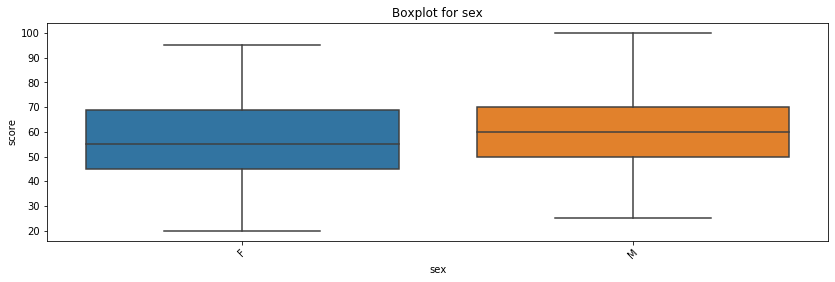

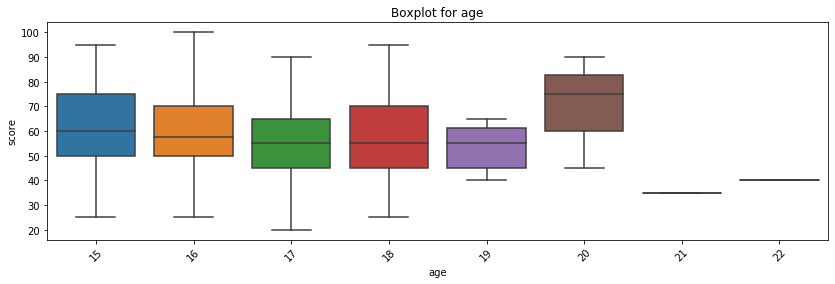

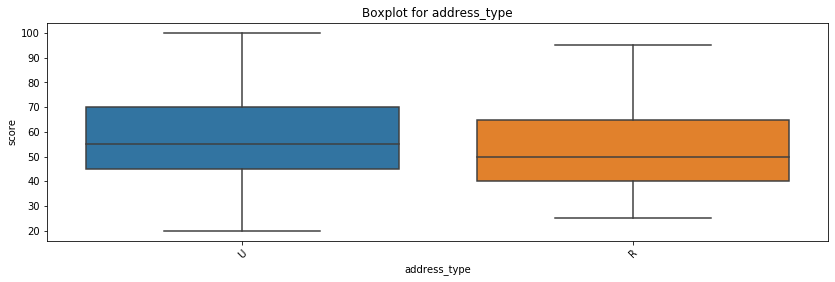

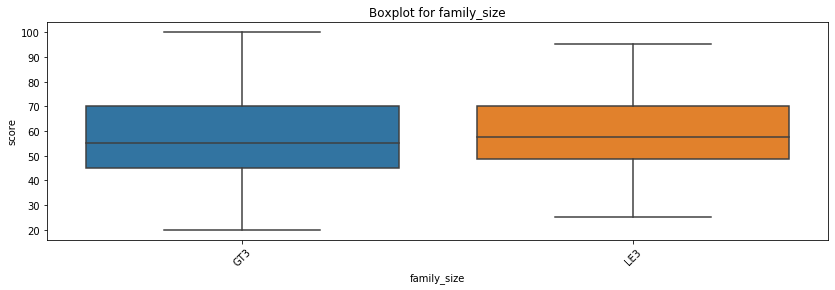

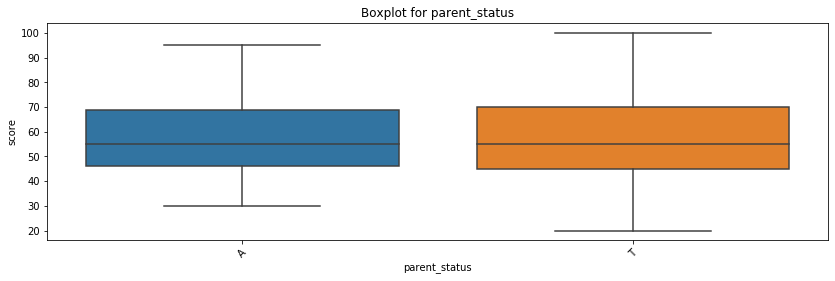

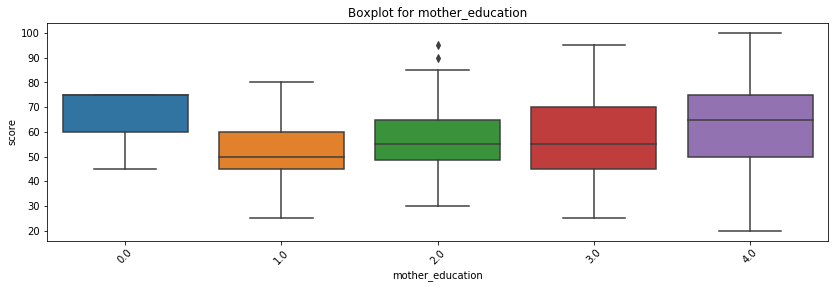

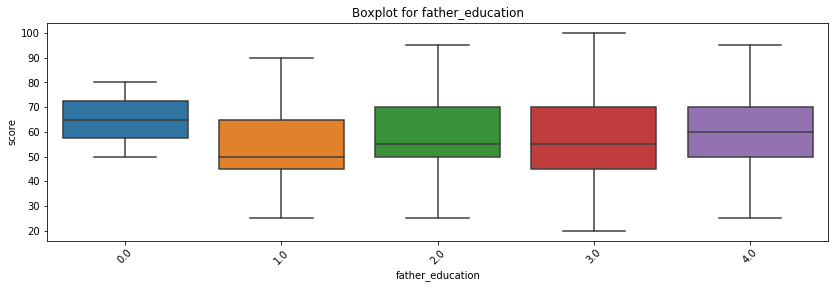

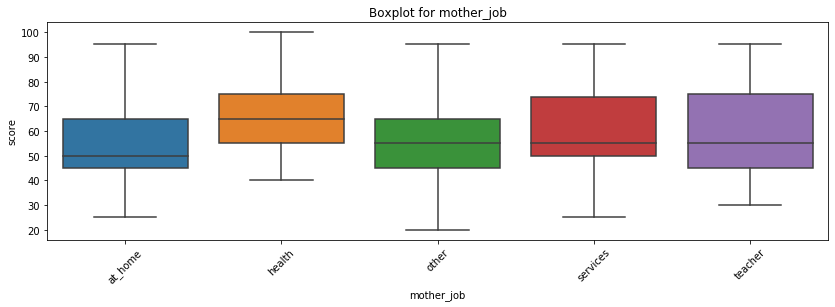

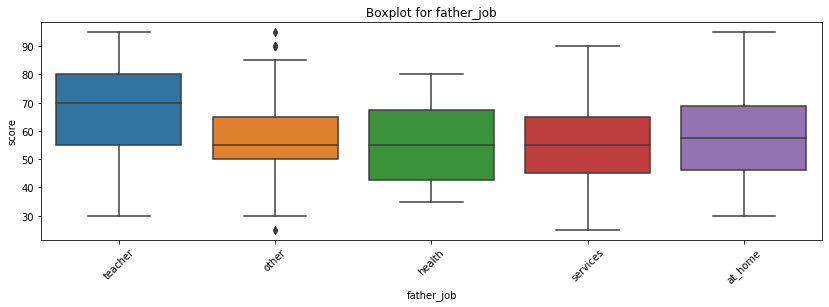

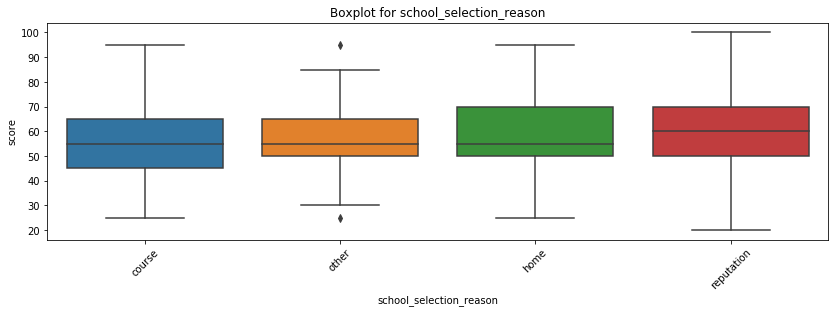

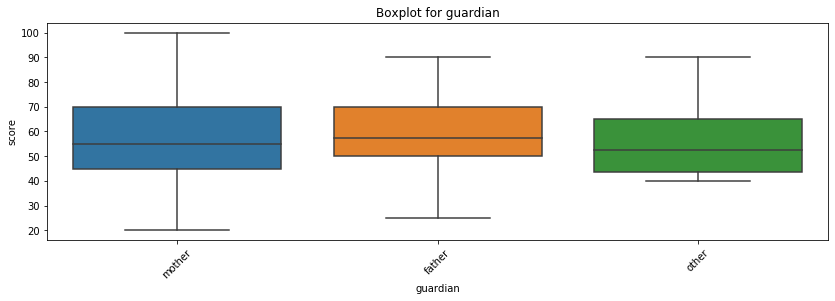

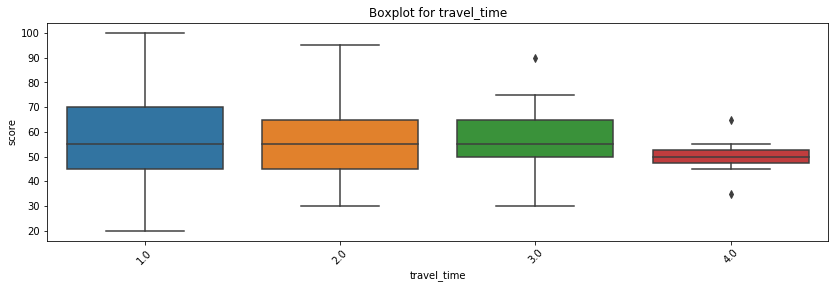

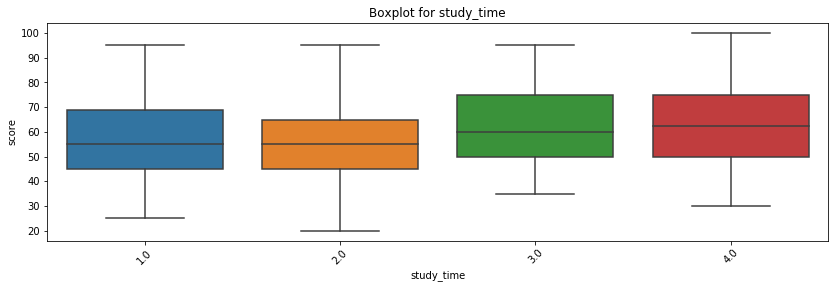

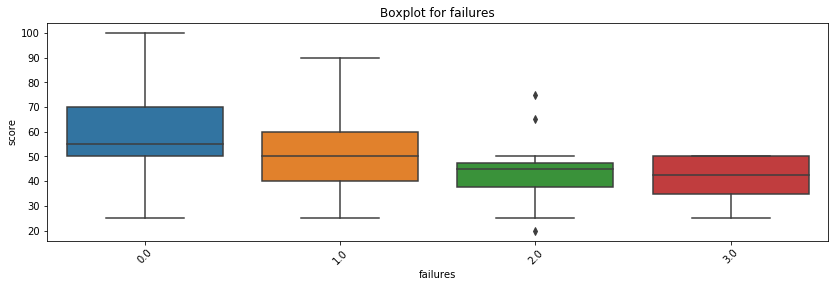

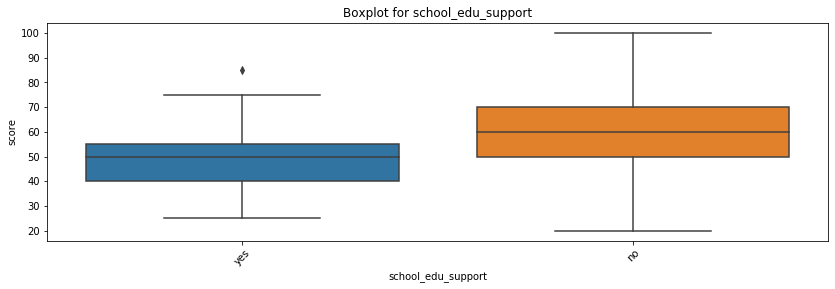

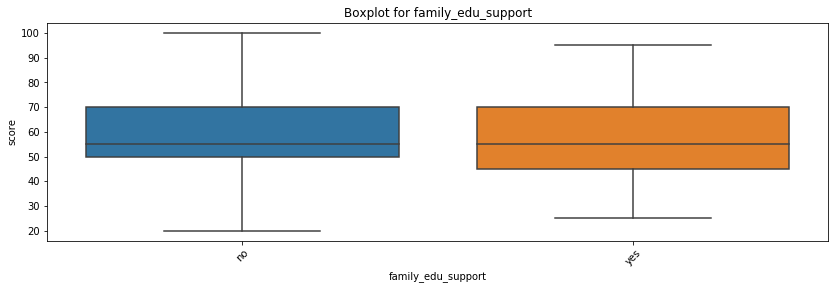

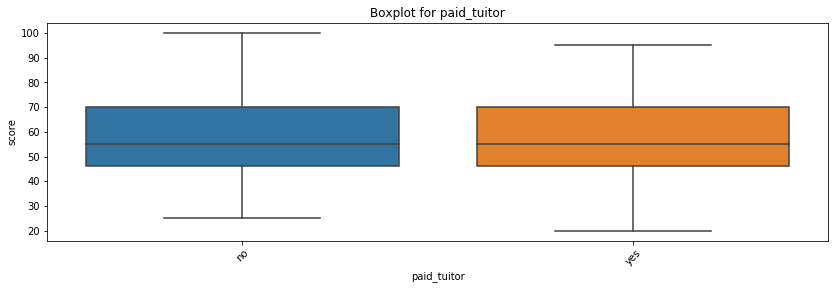

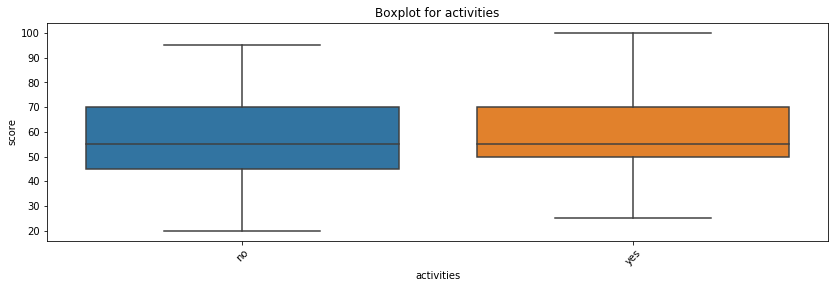

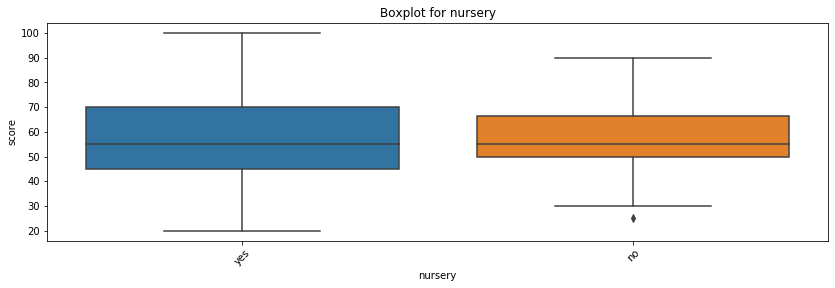

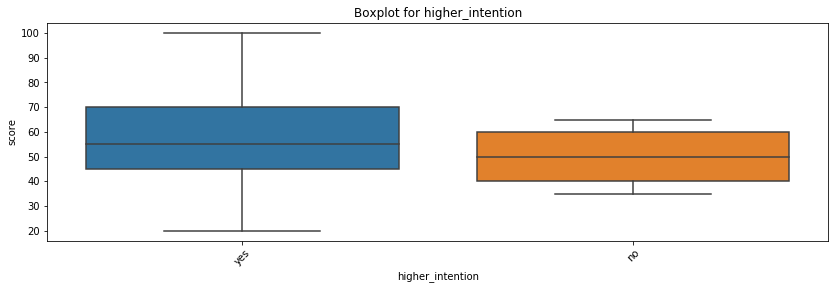

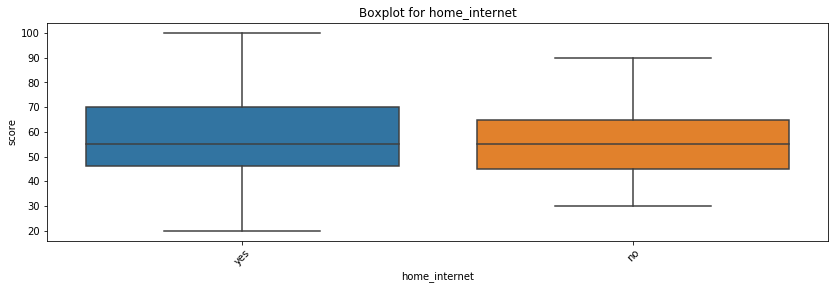

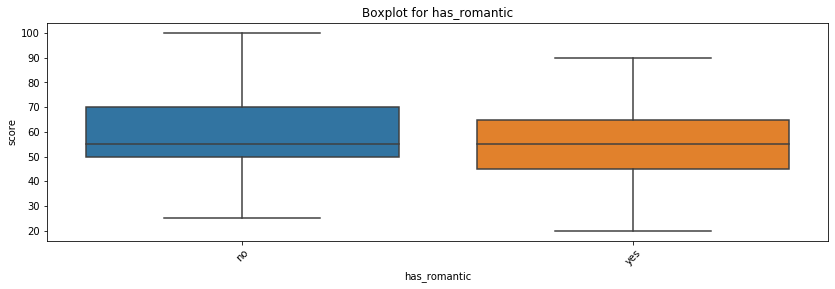

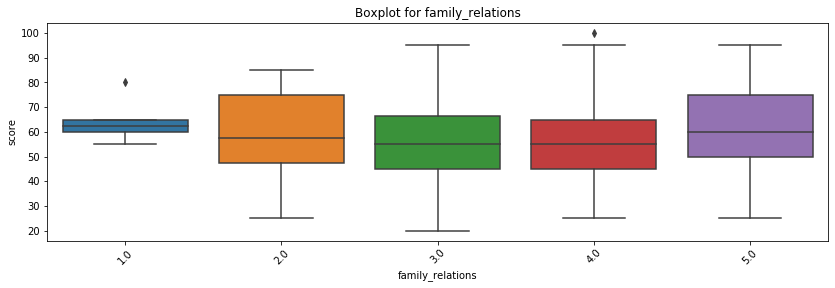

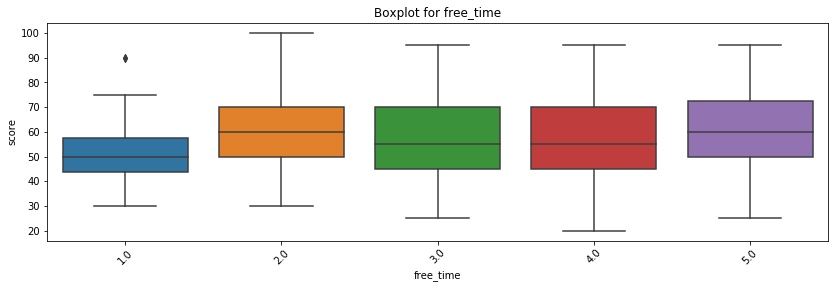

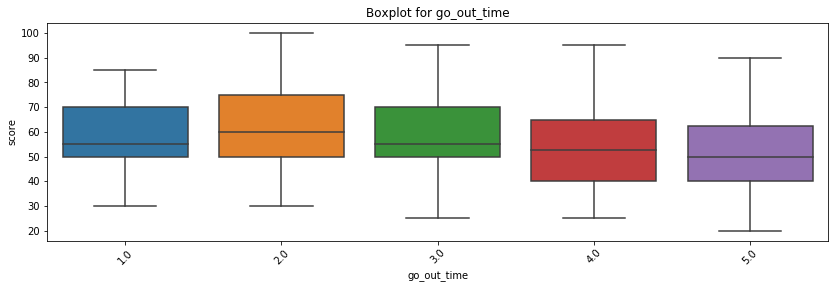

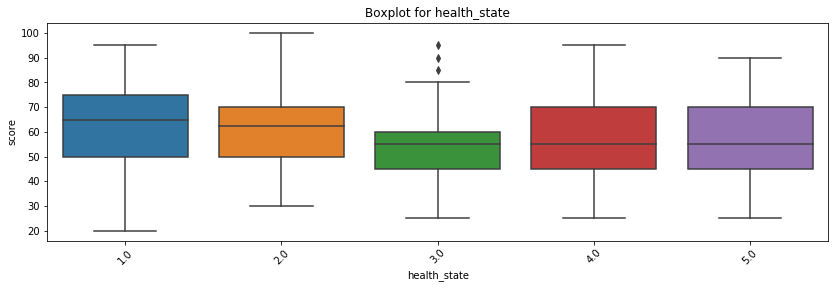

In [62]:
for col in categorical_variables.columns:
    get_boxplot(df, col)

Score distribution is significantly different for 20 years old students (which might be explained by preparing to school final exams and university entrance exams). Since age is not related to environment and live conditions (which are the target of the research) it is recommended to split data set by age (age = 20 and age != 20) and calculate models for each group separately.

## Searching for statistically significant differences (T-test)

In [64]:
for col in categorical_variables:
    get_stat_dif(df, col)

Statistically significant differences found for column: address_type
Statistically significant differences found for column: mother_education
Statistically significant differences found for column: father_education
Statistically significant differences found for column: mother_job
Statistically significant differences found for column: father_job
Statistically significant differences found for column: study_time
Statistically significant differences found for column: failures
Statistically significant differences found for column: school_edu_support
Statistically significant differences found for column: go_out_time


## Fields for model

In [57]:
data_for_model = df.loc[:, ['address_type', 'mother_education', 'father_education', 'mother_job', 'father_job', 'study_time', 'failures', 'school_edu_support', 'go_out_time', 'score']]
data_for_model.head()

,address_type,mother_education,father_education,mother_job,father_job,study_time,failures,school_edu_support,go_out_time,score
0,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0,30.0
1,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0,30.0
2,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0,50.0
3,U,4.0,2.0,health,None,3.0,0.0,no,2.0,75.0
4,U,3.0,3.0,other,other,2.0,0.0,no,2.0,50.0
